<a href="https://colab.research.google.com/github/vinayykkumar/Forecasting-Trends-with-Powerful-LSTM_Models_Infosys_Internship_Oct2024/blob/DHANUSH-M-P/milestone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load the dataset
data = pd.read_csv('pollution_test_data1.csv', index_col=0)  # Replace with your file
data.index = pd.to_datetime(data.index)
data.index


DatetimeIndex(['1969-12-31 23:59:59.999999984',
               '1969-12-31 23:59:59.999999983',
               '1969-12-31 23:59:59.999999984',
               '1969-12-31 23:59:59.999999984',
               '1969-12-31 23:59:59.999999986',
               '1969-12-31 23:59:59.999999985',
               '1969-12-31 23:59:59.999999985',
               '1969-12-31 23:59:59.999999986',
               '1969-12-31 23:59:59.999999986',
               '1969-12-31 23:59:59.999999986',
               ...
               '1969-12-31 23:59:59.999999973',
               '1969-12-31 23:59:59.999999974',
               '1969-12-31 23:59:59.999999977',
               '1969-12-31 23:59:59.999999978',
               '1969-12-31 23:59:59.999999978',
               '1969-12-31 23:59:59.999999977',
               '1969-12-31 23:59:59.999999978',
               '1969-12-31 23:59:59.999999978',
               '1969-12-31 23:59:59.999999978',
               '1969-12-31 23:59:59.999999979'],
              dtype=

In [ ]:
data

,temp,press,wnd_dir,wnd_spd,snow,rain,pollution
dew,,,,,,,
1969-12-31 23:59:59.999999984,4,1027,SE,3.58,0,0,128
1969-12-31 23:59:59.999999983,5,1027,SE,7.60,0,0,77
1969-12-31 23:59:59.999999984,4,1027,SE,9.39,0,0,65
1969-12-31 23:59:59.999999984,1,1028,cv,0.89,0,0,79
1969-12-31 23:59:59.999999986,0,1028,NE,1.79,0,0,93
...,...,...,...,...,...,...,...
1969-12-31 23:59:59.999999977,-2,1034,NW,231.97,0,0,8
1969-12-31 23:59:59.999999978,-3,1034,NW,237.78,0,0,10
1969-12-31 23:59:59.999999978,-3,1034,NW,242.70,0,0,10


In [ ]:

# Select features and target
features = data.drop(columns=['pollution'])  # Example: Drop pollution if it's the target

features


,temp,press,wnd_dir,wnd_spd,snow,rain
dew,,,,,,
1969-12-31 23:59:59.999999984,4,1027,SE,3.58,0,0
1969-12-31 23:59:59.999999983,5,1027,SE,7.60,0,0
1969-12-31 23:59:59.999999984,4,1027,SE,9.39,0,0
1969-12-31 23:59:59.999999984,1,1028,cv,0.89,0,0
1969-12-31 23:59:59.999999986,0,1028,NE,1.79,0,0
...,...,...,...,...,...,...
1969-12-31 23:59:59.999999977,-2,1034,NW,231.97,0,0
1969-12-31 23:59:59.999999978,-3,1034,NW,237.78,0,0
1969-12-31 23:59:59.999999978,-3,1034,NW,242.70,0,0


In [ ]:
target = data['pollution']
target

,pollution
dew,
1969-12-31 23:59:59.999999984,128
1969-12-31 23:59:59.999999983,77
1969-12-31 23:59:59.999999984,65
1969-12-31 23:59:59.999999984,79
1969-12-31 23:59:59.999999986,93
...,...
1969-12-31 23:59:59.999999977,8
1969-12-31 23:59:59.999999978,10
1969-12-31 23:59:59.999999978,10


In [ ]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))

scaled_target = scaler.fit_transform(target.values.reshape(-1, 1))
scaled_target


array([[0.28828829],
       [0.17342342],
       [0.1463964 ],
       [0.17792793],
       [0.20945946],
       [0.23423423],
       [0.45495495],
       [0.5518018 ],
       [0.50675676],
       [0.40540541],
       [0.40540541],
       [0.38288288],
       [0.36036036],
       [0.32882883],
       [0.28153153],
       [0.29279279],
       [0.31081081],
       [0.33108108],
       [0.30405405],
       [0.30630631],
       [0.27927928],
       [0.30405405],
       [0.2972973 ],
       [0.29954955],
       [0.31981982],
       [0.36711712],
       [0.37387387],
       [0.42567568],
       [0.45495495],
       [0.51351351],
       [0.54054054],
       [0.52927928],
       [0.56756757],
       [0.57207207],
       [0.61711712],
       [0.56981982],
       [0.55855856],
       [0.49324324],
       [0.4481982 ],
       [0.44594595],
       [0.45945946],
       [0.14864865],
       [0.04954955],
       [0.04279279],
       [0.03603604],
       [0.02477477],
       [0.03828829],
       [0.033

In [ ]:
def create_sequences(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, :-1])  # All columns except the target
        y.append(data[i + time_steps, -1])    # Target column
    return np.array(X), np.array(y)

time_steps = 10  # Number of previous time steps to consider
X, y = create_sequences(scaled_target, time_steps)


# Split data
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:

from tensorflow.keras.layers import LSTM, Dense, Dropout
#build
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Single output for regression
])

model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
#training the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)
history

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.1049 - val_loss: 0.0323
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1063 - val_loss: 0.0303
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1139 - val_loss: 0.0286
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1048 - val_loss: 0.0270
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1102 - val_loss: 0.0256
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0940 - val_loss: 0.0244
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0811 - val_loss: 0.0234
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0900 - val_loss: 0.0224
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0747 - val_loss: 0.0217
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0725 - val_loss: 0.0210
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0782 - val_loss: 0.0205
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0717 - val_loss: 0.0201
E

In [ ]:

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), scaled_target.shape[1]-1)), y_pred), axis=1))[:, -1]


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0294 
Test Loss: 0.030536174774169922
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step


In [ ]:
y_pred

array([100.81732839, 100.81732839, 100.81732839, 100.81732839,
       100.81732839, 100.81732839, 100.81732839, 100.81732839,
       100.81732839, 100.81732839, 100.81732839, 100.81732839,
       100.81732839, 100.81732839, 100.81732839, 100.81732839,
       100.81732839, 100.81732839, 100.81732839, 100.81732839,
       100.81732839, 100.81732839, 100.81732839, 100.81732839,
       100.81732839, 100.81732839, 100.81732839, 100.81732839,
       100.81732839, 100.81732839, 100.81732839, 100.81732839,
       100.81732839, 100.81732839, 100.81732839, 100.81732839,
       100.81732839, 100.81732839, 100.81732839, 100.81732839,
       100.81732839, 100.81732839, 100.81732839, 100.81732839,
       100.81732839, 100.81732839, 100.81732839, 100.81732839,
       100.81732839, 100.81732839, 100.81732839, 100.81732839,
       100.81732839, 100.81732839, 100.81732839, 100.81732839,
       100.81732839, 100.81732839, 100.81732839, 100.81732839,
       100.81732839, 100.81732839, 100.81732839, 100.81

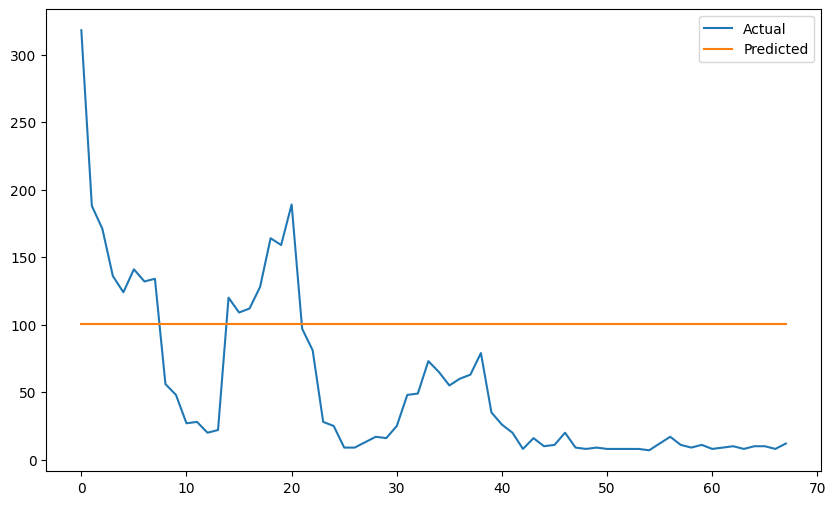

In [ ]:
#plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), scaled_target.shape[1]-1)), y_test.reshape(-1, 1)), axis=1))[:, -1], label='Actual')
plt.plot(range(len(y_pred)), y_pred, label='Predicted')
plt.legend()
plt.show()


In [ ]:
#1.

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Load the Dataset

dataset_path = "pollution_test_data1.csv"
df = pd.read_csv(dataset_path)
df


,dew,temp,press,pollution,wnd_spd,snow,rain
0,-16,4,1027,128,3.58,0,0
1,-17,5,1027,77,7.60,0,0
2,-16,4,1027,65,9.39,0,0
3,-16,1,1028,79,0.89,0,0
4,-14,0,1028,93,1.79,0,0
...,...,...,...,...,...,...,...
341,-23,-2,1034,8,231.97,0,0
342,-22,-3,1034,10,237.78,0,0
343,-22,-3,1034,10,242.70,0,0
344,-22,-4,1034,8,246.72,0,0


In [ ]:
print("Dataset Head:")
print(df.head())

Dataset Head:
   dew  temp  press  pollution  wnd_spd  snow  rain
0  -16     4   1027        128     3.58     0     0
1  -17     5   1027         77     7.60     0     0
2  -16     4   1027         65     9.39     0     0
3  -16     1   1028         79     0.89     0     0
4  -14     0   1028         93     1.79     0     0


In [ ]:
# Step 2: Data Preprocessing

# Check for NaN values
df = df.dropna()
df

,dew,temp,press,pollution,wnd_spd,snow,rain
0,-16,4,1027,128,3.58,0,0
1,-17,5,1027,77,7.60,0,0
2,-16,4,1027,65,9.39,0,0
3,-16,1,1028,79,0.89,0,0
4,-14,0,1028,93,1.79,0,0
...,...,...,...,...,...,...,...
341,-23,-2,1034,8,231.97,0,0
342,-22,-3,1034,10,237.78,0,0
343,-22,-3,1034,10,242.70,0,0
344,-22,-4,1034,8,246.72,0,0


In [ ]:
# Feature scaling using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)
scaled_data


array([[0.52380952, 0.65      , 0.66666667, ..., 0.00710185, 0.        ,
        0.        ],
       [0.47619048, 0.7       , 0.66666667, ..., 0.01622308, 0.        ,
        0.        ],
       [0.52380952, 0.65      , 0.66666667, ..., 0.02028453, 0.        ,
        0.        ],
       ...,
       [0.23809524, 0.3       , 0.95833333, ..., 0.54965625, 0.        ,
        0.        ],
       [0.23809524, 0.25      , 0.95833333, ..., 0.55877748, 0.        ,
        0.        ],
       [0.28571429, 0.3       , 0.95833333, ..., 0.56587934, 0.        ,
        0.        ]])

In [ ]:
# Step 3: Define function to frame the supervised learning problem
def create_sequences(data, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(data)):
        # Find the end of this sequence
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # Break if we exceed dataset length
        if out_end_ix > len(data):
            break
        # Input and output sequence
        seq_x, seq_y = data[i:end_ix, :-1], data[end_ix:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
# Parameters for input/output steps
n_steps_in, n_steps_out = 5, 1

# Prepare sequences
X, y = create_sequences(scaled_data, n_steps_in, n_steps_out)
print("Input Shape:", X.shape, "Output Shape:", y.shape)

Input Shape: (341, 5, 6) Output Shape: (341, 1)


In [ ]:
# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train

array([[[0.52380952, 0.65      , 0.66666667, 0.28828829, 0.00710185,
         0.        ],
        [0.47619048, 0.7       , 0.66666667, 0.17342342, 0.01622308,
         0.        ],
        [0.52380952, 0.65      , 0.66666667, 0.1463964 , 0.02028453,
         0.        ],
        [0.52380952, 0.5       , 0.70833333, 0.17792793, 0.00099834,
         0.        ],
        [0.61904762, 0.45      , 0.70833333, 0.20945946, 0.00304041,
         0.        ]],

       [[0.47619048, 0.7       , 0.66666667, 0.17342342, 0.01622308,
         0.        ],
        [0.52380952, 0.65      , 0.66666667, 0.1463964 , 0.02028453,
         0.        ],
        [0.52380952, 0.5       , 0.70833333, 0.17792793, 0.00099834,
         0.        ],
        [0.61904762, 0.45      , 0.70833333, 0.20945946, 0.00304041,
         0.        ],
        [0.57142857, 0.35      , 0.75      , 0.23423423, 0.00710185,
         0.        ]],

       [[0.52380952, 0.65      , 0.66666667, 0.1463964 , 0.02028453,
         0.      

In [ ]:
y_train

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [ ]:
X_test

array([[[0.80952381, 0.55      , 0.25      , 0.72972973, 0.0050371 ,
         0.        ],
        [0.80952381, 0.35      , 0.25      , 0.76801802, 0.00605813,
         0.        ],
        [0.80952381, 0.25      , 0.20833333, 0.81531532, 0.00807751,
         0.        ],
        [0.80952381, 0.2       , 0.20833333, 0.83783784, 0.01009688,
         0.        ],
        [0.76190476, 0.2       , 0.16666667, 0.84009009, 0.01211626,
         0.        ]],

       [[0.80952381, 0.35      , 0.25      , 0.76801802, 0.00605813,
         0.        ],
        [0.80952381, 0.25      , 0.20833333, 0.81531532, 0.00807751,
         0.        ],
        [0.80952381, 0.2       , 0.20833333, 0.83783784, 0.01009688,
         0.        ],
        [0.76190476, 0.2       , 0.16666667, 0.84009009, 0.01211626,
         0.        ],
        [0.76190476, 0.15      , 0.16666667, 0.83783784, 0.01413564,
         0.        ]],

       [[0.80952381, 0.25      , 0.20833333, 0.81531532, 0.00807751,
         0.      

In [ ]:
# Step 5: Build the Vanilla LSTM Model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 50)                  │          11,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,451 (44.73 KB)

 Trainable params: 11,451 (44.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 1.5862e-04 - val_loss: 1.9771e-04
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.6966e-05 - val_loss: 4.3058e-05
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3310e-05 - val_loss: 5.5647e-05
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2331e-05 - val_loss: 6.6801e-05
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.5689e-06 - val_loss: 7.0016e-05
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.8066e-06 - val_loss: 5.0017e-05
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.8464e-06 - val_loss: 4.7157e-05
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6701e-06 - val_loss: 4.7952e-05
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6945e-06 - val_loss: 4.0570e-05
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.3535e-06 - val_loss: 3.6039e-05
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.3195e-06 - val_loss: 3.5134e-05
Epoch

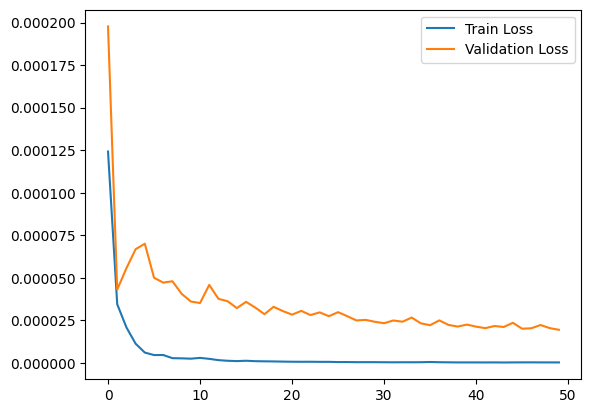

In [ ]:
# Step 7: Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
# Step 8: Predict and Inverse Transform
predictions = model.predict(X_test)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


In [ ]:
# Since we scaled the data, reverse scaling
y_test_rescaled = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], y_test.reshape(-1, 1)), axis=1))[:, -1]
predictions_rescaled = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], predictions), axis=1))[:, -1]
y_test_rescaled

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [ ]:
predictions_rescaled

array([ 2.23627710e-03,  4.22744639e-03,  4.97492682e-03,  8.52367142e-04,
       -1.68868317e-03, -2.92956154e-03, -2.41681817e-03,  3.07734590e-05,
        1.85056380e-03,  2.73956568e-03,  2.16992036e-03,  3.01384856e-03,
        4.33932524e-03,  4.45071235e-03,  5.17147314e-03,  4.72810771e-03,
        3.33677954e-03,  2.05545523e-03,  1.85846328e-03,  1.65002397e-03,
        2.24413094e-03,  2.34575034e-03,  2.21942295e-03,  1.67368934e-03,
        1.12571637e-03,  7.79867405e-04,  1.07927551e-03,  1.31213875e-03,
        1.26011972e-03,  1.52891292e-03,  1.01966807e-03,  6.39247941e-04,
        4.55071451e-04,  1.70372892e-04, -1.68552389e-04,  2.74164602e-04,
        1.31941866e-04,  4.30724118e-04,  7.05576967e-05,  1.13891670e-04,
        2.66194111e-04, -9.62898368e-04, -3.00777843e-04, -1.26356026e-04,
       -6.59557525e-04, -1.16850180e-03, -6.96218340e-04,  5.47871459e-05,
        1.05371443e-03,  1.24684279e-03,  3.96502437e-04, -1.40438112e-03,
       -5.96317369e-03, -

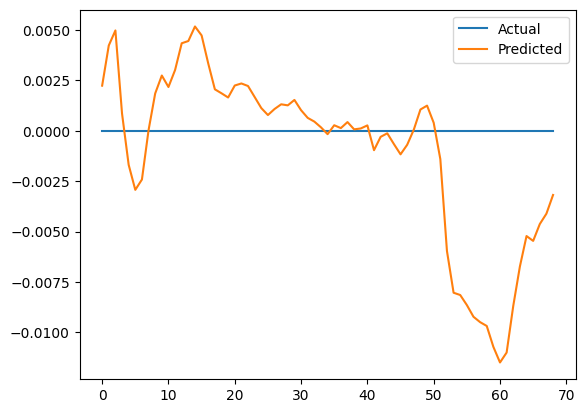

In [ ]:
# Plot predictions vs actual
time_axis = np.arange(len(y_test_rescaled))
plt.plot(time_axis, y_test_rescaled, label='Actual')
plt.plot(time_axis, predictions_rescaled, label='Predicted')
plt.legend()
plt.show()


In [ ]:
#2.
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Feature scaling using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values)
scaled_data


array([[0.52380952, 0.65      , 0.66666667, ..., 0.00710185, 0.        ,
        0.        ],
       [0.47619048, 0.7       , 0.66666667, ..., 0.01622308, 0.        ,
        0.        ],
       [0.52380952, 0.65      , 0.66666667, ..., 0.02028453, 0.        ,
        0.        ],
       ...,
       [0.23809524, 0.3       , 0.95833333, ..., 0.54965625, 0.        ,
        0.        ],
       [0.23809524, 0.25      , 0.95833333, ..., 0.55877748, 0.        ,
        0.        ],
       [0.28571429, 0.3       , 0.95833333, ..., 0.56587934, 0.        ,
        0.        ]])

In [ ]:
# Step 3: Define function to frame the supervised learning problem
def create_sequences(data, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(data)):
        # Find the end of this sequence
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # Break if we exceed dataset length
        if out_end_ix > len(data):
            break
        # Input and output sequence
        seq_x, seq_y = data[i:end_ix, :-1], data[end_ix:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
n_steps_in, n_steps_out = 5,1  # 24 past hours to predict 6 future hours
# Prepare sequences
X, y = create_sequences(scaled_data, n_steps_in, n_steps_out)
print("Input Shape:", X.shape, "Output Shape:", y.shape)

Input Shape: (341, 5, 6) Output Shape: (341, 1)


In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                        │ (None, 50)                  │          11,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,451 (44.73 KB)

 Trainable params: 11,451 (44.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train

array([[[0.52380952, 0.65      , 0.66666667, 0.28828829, 0.00710185,
         0.        ],
        [0.47619048, 0.7       , 0.66666667, 0.17342342, 0.01622308,
         0.        ],
        [0.52380952, 0.65      , 0.66666667, 0.1463964 , 0.02028453,
         0.        ],
        [0.52380952, 0.5       , 0.70833333, 0.17792793, 0.00099834,
         0.        ],
        [0.61904762, 0.45      , 0.70833333, 0.20945946, 0.00304041,
         0.        ]],

       [[0.47619048, 0.7       , 0.66666667, 0.17342342, 0.01622308,
         0.        ],
        [0.52380952, 0.65      , 0.66666667, 0.1463964 , 0.02028453,
         0.        ],
        [0.52380952, 0.5       , 0.70833333, 0.17792793, 0.00099834,
         0.        ],
        [0.61904762, 0.45      , 0.70833333, 0.20945946, 0.00304041,
         0.        ],
        [0.57142857, 0.35      , 0.75      , 0.23423423, 0.00710185,
         0.        ]],

       [[0.52380952, 0.65      , 0.66666667, 0.1463964 , 0.02028453,
         0.      

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining the model...")
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

history


Training the model...
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 1.2945e-05 - mae: 0.0028 - val_loss: 1.4128e-06 - val_mae: 0.0010
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.7189e-06 - mae: 0.0019 - val_loss: 9.4585e-07 - val_mae: 8.5071e-04
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.6927e-06 - mae: 0.0011 - val_loss: 2.6805e-07 - val_mae: 4.1124e-04
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 8.7392e-07 - mae: 7.7102e-04 - val_loss: 2.1231e-07 - val_mae: 3.9070e-04
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 4.4547e-07 - mae: 5.5816e-04 - val_loss: 3.1778e-07 - val_mae: 4.7474e-04
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 4.3153e-07 - mae: 5.5561e-04 - val_loss: 3.9991e-07 - val_mae: 5.5393e-04
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.0152e-07 - mae: 4.7087e-04 - val_loss: 2.8618e-07 - val_mae: 4.6122e-04
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2.0172e-07 - mae: 3

In [ ]:
print("\nTraining shape:", X_train.shape, y_train.shape)
print("Testing shape:", X_test.shape, y_test.shape)



Training shape: (253, 24, 7) (253, 6)
Testing shape: (64, 24, 7) (64, 6)


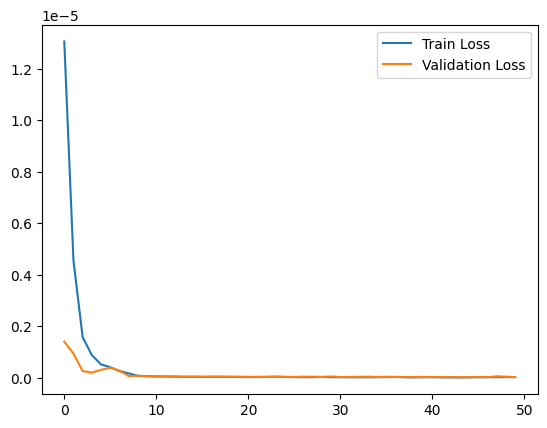

In [ ]:
# Step 7: Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


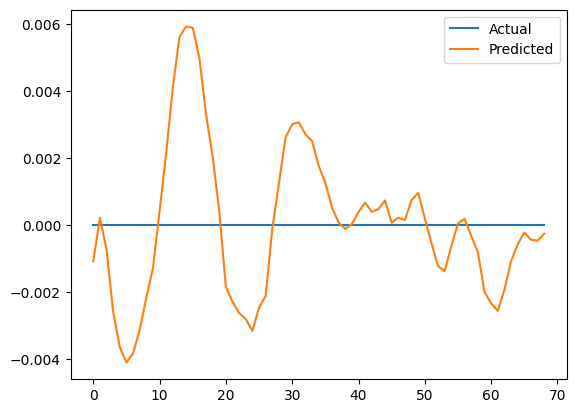

In [ ]:
# Plot predictions vs actual
time_axis = np.arange(len(y_test_rescaled))
plt.plot(time_axis, y_test_rescaled, label='Actual')
plt.plot(time_axis, predictions_rescaled, label='Predicted')
plt.legend()
plt.show()


In [ ]:
#3.
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
data = pd.read_csv("pollution_test_data1.csv")
print("Dataset Preview:")
print(data.head())

Dataset Preview:
   dew  temp  press  pollution  wnd_spd  snow  rain
0  -16     4   1027        128     3.58     0     0
1  -17     5   1027         77     7.60     0     0
2  -16     4   1027         65     9.39     0     0
3  -16     1   1028         79     0.89     0     0
4  -14     0   1028         93     1.79     0     0


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values)
scaled_data

array([[0.52380952, 0.65      , 0.66666667, ..., 0.00710185, 0.        ,
        0.        ],
       [0.47619048, 0.7       , 0.66666667, ..., 0.01622308, 0.        ,
        0.        ],
       [0.52380952, 0.65      , 0.66666667, ..., 0.02028453, 0.        ,
        0.        ],
       ...,
       [0.23809524, 0.3       , 0.95833333, ..., 0.54965625, 0.        ,
        0.        ],
       [0.23809524, 0.25      , 0.95833333, ..., 0.55877748, 0.        ,
        0.        ],
       [0.28571429, 0.3       , 0.95833333, ..., 0.56587934, 0.        ,
        0.        ]])

In [ ]:
# Step 3: Define function to frame the supervised learning problem
def create_sequences(data, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(data)):
        # Find the end of this sequence
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # Break if we exceed dataset length
        if out_end_ix > len(data):
            break
        # Input and output sequence
        seq_x, seq_y = data[i:end_ix, :-1], data[end_ix:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
# Define input parameters
n_steps_in, n_steps_out = 5,1  # 24 past hours to predict 6 future hours

# Prepare sequences
X, y = create_sequences(scaled_data, n_steps_in, n_steps_out)
print("Input Shape:", X.shape, "Output Shape:", y.shape)

Input Shape: (341, 5, 6) Output Shape: (341, 1)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train

print("\nTraining shape:", X_train.shape, y_train.shape)
print("Testing shape:", X_test.shape, y_test.shape)


Training shape: (272, 5, 6) (272, 1)
Testing shape: (69, 5, 6) (69, 1)


In [ ]:

# Step 3: Build and train the Bidirectional LSTM model

model = Sequential()
model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True), input_shape=(n_steps_in, X.shape[2])))
model.add(Bidirectional(LSTM(32, activation='relu')))
model.add(Dense(n_steps_out))
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
print("\nTraining the model...")
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Training the model...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 54s 129ms/step - loss: 2.9643e-04 - mae: 0.0139 - val_loss: 6.1204e-05 - val_mae: 0.0065
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 3.5590e-05 - mae: 0.0047 - val_loss: 1.3735e-04 - val_mae: 0.0103
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2.2365e-05 - mae: 0.0038 - val_loss: 3.5470e-05 - val_mae: 0.0047
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.0444e-05 - mae: 0.0027 - val_loss: 1.7290e-05 - val_mae: 0.0034
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 6.4880e-06 - mae: 0.0020 - val_loss: 1.8894e-05 - val_mae: 0.0037
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 3.2010e-06 - mae: 0.0014 - val_loss: 1.7655e-05 - val_mae: 0.0036
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 2.7131e-06 - mae: 0.0013 - val_loss: 1.1387e-05 - val_mae: 0.0028
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.8456e-06 - mae: 0.0010 - val_loss: 1.1740e-05 - val_mae: 0.0029
Epoch 9/50
9/9 ━━━━━━━━━━

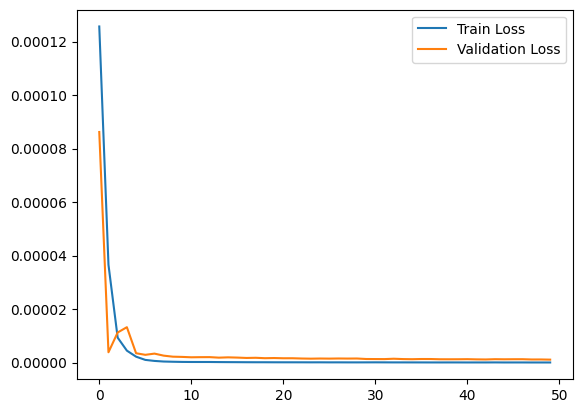

In [ ]:
# Step 7: Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Step 8: Predict and Inverse Transform
predictions = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 263ms/step


In [ ]:
# Since we scaled the data, reverse scaling
y_test_rescaled = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], y_test.reshape(-1, 1)), axis=1))[:, -1]
predictions_rescaled = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], predictions), axis=1))[:, -1]
y_test_rescaled

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [ ]:
predictions_rescaled

array([-6.87178923e-04, -2.91108852e-04, -2.57596839e-05, -1.50956912e-04,
       -3.76646174e-04, -3.56573844e-04, -1.64707424e-04,  6.30949391e-04,
        8.49790173e-04,  1.21366442e-03,  1.76784792e-03,  2.26522493e-03,
        2.06201687e-03,  2.18865718e-03,  2.08167569e-03,  1.89845753e-03,
        1.73141644e-03,  8.86257039e-04,  1.25058694e-04, -1.06349820e-04,
        2.69961776e-04,  5.99917723e-04,  6.73798611e-04,  4.90692211e-04,
        4.14139358e-04, -9.62766353e-05, -3.39781167e-04, -5.57248248e-04,
       -1.14559452e-03, -1.23528228e-03, -1.29522313e-03, -1.34111126e-03,
       -1.40571850e-03, -1.22454274e-03, -9.32478113e-04, -7.62590906e-04,
       -4.87653306e-04, -3.77872726e-04, -4.15086513e-04, -8.07221513e-05,
        2.99859094e-04, -6.85628038e-05, -4.94690379e-04, -3.90982954e-04,
       -6.41482649e-04, -1.18370797e-03, -9.53206560e-04, -5.54202823e-04,
       -2.85047805e-04, -2.34700507e-04, -4.13201516e-04, -4.74462053e-04,
       -5.40519832e-04, -

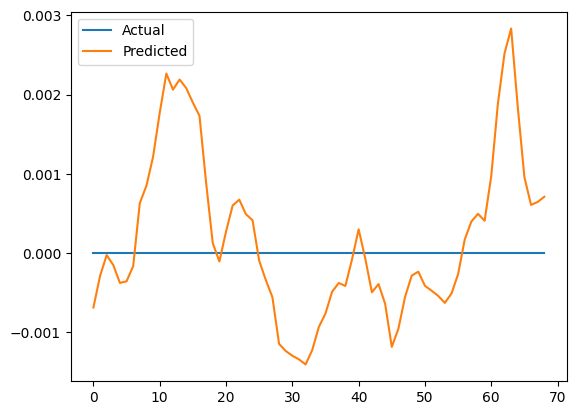

In [ ]:
# Plot predictions vs actual
time_axis = np.arange(len(y_test_rescaled))
plt.plot(time_axis, y_test_rescaled, label='Actual')
plt.plot(time_axis, predictions_rescaled, label='Predicted')
plt.legend()
plt.show()


In [ ]:
#4.

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, TimeDistributed, LSTM, Dense, Flatten
# Feature scaling using MinMaxScaler
data=pd.read_csv("pollution_test_data1.csv")
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values)
scaled_data

array([[0.52380952, 0.65      , 0.66666667, ..., 0.00710185, 0.        ,
        0.        ],
       [0.47619048, 0.7       , 0.66666667, ..., 0.01622308, 0.        ,
        0.        ],
       [0.52380952, 0.65      , 0.66666667, ..., 0.02028453, 0.        ,
        0.        ],
       ...,
       [0.23809524, 0.3       , 0.95833333, ..., 0.54965625, 0.        ,
        0.        ],
       [0.23809524, 0.25      , 0.95833333, ..., 0.55877748, 0.        ,
        0.        ],
       [0.28571429, 0.3       , 0.95833333, ..., 0.56587934, 0.        ,
        0.        ]])

In [ ]:
# Step 3: Define function to frame the supervised learning problem
def create_sequences(data, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(data)):
        # Find the end of this sequence
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # Break if we exceed dataset length
        if out_end_ix > len(data):
            break
        # Input and output sequence
        seq_x, seq_y = data[i:end_ix, :-1], data[end_ix:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
# Parameters for input/output steps
n_steps_in, n_steps_out = 5, 1

# Prepare sequences
X, y = create_sequences(scaled_data, n_steps_in, n_steps_out)
print("Input Shape:", X.shape, "Output Shape:", y.shape)

Input Shape: (341, 5, 6) Output Shape: (341, 1)


In [ ]:
# Reshape X for CNN-LSTM (samples, timesteps, features)
n_features = X.shape[2]
X = X.reshape((X.shape[0], n_steps_in, n_features))
X

array([[[0.52380952, 0.65      , 0.66666667, 0.28828829, 0.00710185,
         0.        ],
        [0.47619048, 0.7       , 0.66666667, 0.17342342, 0.01622308,
         0.        ],
        [0.52380952, 0.65      , 0.66666667, 0.1463964 , 0.02028453,
         0.        ],
        [0.52380952, 0.5       , 0.70833333, 0.17792793, 0.00099834,
         0.        ],
        [0.61904762, 0.45      , 0.70833333, 0.20945946, 0.00304041,
         0.        ]],

       [[0.47619048, 0.7       , 0.66666667, 0.17342342, 0.01622308,
         0.        ],
        [0.52380952, 0.65      , 0.66666667, 0.1463964 , 0.02028453,
         0.        ],
        [0.52380952, 0.5       , 0.70833333, 0.17792793, 0.00099834,
         0.        ],
        [0.61904762, 0.45      , 0.70833333, 0.20945946, 0.00304041,
         0.        ],
        [0.57142857, 0.35      , 0.75      , 0.23423423, 0.00710185,
         0.        ]],

       [[0.52380952, 0.65      , 0.66666667, 0.1463964 , 0.02028453,
         0.      

In [ ]:
# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train

array([[[0.52380952, 0.65      , 0.66666667, 0.28828829, 0.00710185,
         0.        ],
        [0.47619048, 0.7       , 0.66666667, 0.17342342, 0.01622308,
         0.        ],
        [0.52380952, 0.65      , 0.66666667, 0.1463964 , 0.02028453,
         0.        ],
        [0.52380952, 0.5       , 0.70833333, 0.17792793, 0.00099834,
         0.        ],
        [0.61904762, 0.45      , 0.70833333, 0.20945946, 0.00304041,
         0.        ]],

       [[0.47619048, 0.7       , 0.66666667, 0.17342342, 0.01622308,
         0.        ],
        [0.52380952, 0.65      , 0.66666667, 0.1463964 , 0.02028453,
         0.        ],
        [0.52380952, 0.5       , 0.70833333, 0.17792793, 0.00099834,
         0.        ],
        [0.61904762, 0.45      , 0.70833333, 0.20945946, 0.00304041,
         0.        ],
        [0.57142857, 0.35      , 0.75      , 0.23423423, 0.00710185,
         0.        ]],

       [[0.52380952, 0.65      , 0.66666667, 0.1463964 , 0.02028453,
         0.      

In [ ]:
model = Sequential()

# Add TimeDistributed Conv1D and pooling layers
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None, n_features, 1)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed_3 (TimeDistributed) │ (None, None, 4, 64)         │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_4 (TimeDistributed) │ (None, None, 2, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_5 (TimeDistributed) │ (None, None, 128)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 256 (1.00 KB)

 Trainable params: 256 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.2967e-06 - mae: 0.0020 
Test Loss: 0.0000, Test MAE: 0.0017


In [ ]:
predictions= model.predict(X_test)
# Since we scaled the data, reverse scaling
y_test_rescaled = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], y_test.reshape(-1, 1)), axis=1))[:, -1]
predictions_rescaled = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], predictions), axis=1))[:, -1]
y_test_rescaled


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

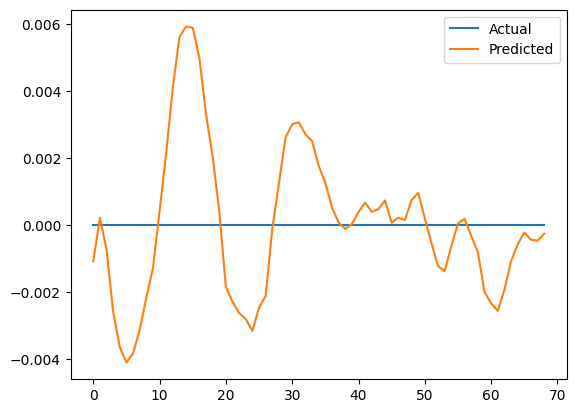

In [ ]:
# Plot predictions vs actual
import matplotlib.pyplot as plt
time_axis = np.arange(len(y_test_rescaled))
plt.plot(time_axis, y_test_rescaled, label='Actual')
plt.plot(time_axis, predictions_rescaled, label='Predicted')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Flatten, Dense, TimeDistributed



In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[0.52380952, 0.65      , 0.66666667, ..., 0.00710185, 0.        ,
        0.        ],
       [0.47619048, 0.7       , 0.66666667, ..., 0.01622308, 0.        ,
        0.        ],
       [0.52380952, 0.65      , 0.66666667, ..., 0.02028453, 0.        ,
        0.        ],
       ...,
       [0.23809524, 0.3       , 0.95833333, ..., 0.54965625, 0.        ,
        0.        ],
       [0.23809524, 0.25      , 0.95833333, ..., 0.55877748, 0.        ,
        0.        ],
       [0.28571429, 0.3       , 0.95833333, ..., 0.56587934, 0.        ,
        0.        ]])

In [ ]:
def create_sequences(data, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(data):
            break
        seq_x, seq_y = data[i:end_ix, :], data[end_ix:out_end_ix, 3]  # Predict 'pollution' (column 3)
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Define the number of time steps
n_steps_in, n_steps_out = 24, 6  # Predict next 6 hours from last 24 hours
X, y = create_sequences(scaled_data, n_steps_in, n_steps_out)

# Reshape data for CNN-LSTM
X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))
X


array([[[0.52380952, 0.65      , 0.66666667, ..., 0.00710185,
         0.        , 0.        ],
        [0.47619048, 0.7       , 0.66666667, ..., 0.01622308,
         0.        , 0.        ],
        [0.52380952, 0.65      , 0.66666667, ..., 0.02028453,
         0.        , 0.        ],
        ...,
        [0.71428571, 0.45      , 0.83333333, ..., 0.00304041,
         0.        , 0.        ],
        [0.80952381, 0.5       , 0.75      , ..., 0.00304041,
         0.        , 0.        ],
        [0.85714286, 0.55      , 0.70833333, ..., 0.00304041,
         0.        , 0.        ]],

       [[0.47619048, 0.7       , 0.66666667, ..., 0.01622308,
         0.        , 0.        ],
        [0.52380952, 0.65      , 0.66666667, ..., 0.02028453,
         0.        , 0.        ],
        [0.52380952, 0.5       , 0.70833333, ..., 0.00099834,
         0.        , 0.        ],
        ...,
        [0.80952381, 0.5       , 0.75      , ..., 0.00304041,
         0.        , 0.        ],
        [0.8

In [ ]:
# Define input parameters
n_steps_in, n_steps_out = 5,1  # 24 past hours to predict 6 future hours

# Prepare sequences
X, y = create_sequences(scaled_data, n_steps_in, n_steps_out)
print("Input Shape:", X.shape, "Output Shape:", y.shape)


Input Shape: (341, 5, 7) Output Shape: (341, 1)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train

print("\nTraining shape:", X_train.shape, y_train.shape)
print("Testing shape:", X_test.shape, y_test.shape)


Training shape: (272, 5, 7) (272, 1)
Testing shape: (69, 5, 7) (69, 1)


In [ ]:
model = Sequential()

# CNN for feature extraction
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None, n_steps_in, X.shape[2])))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed_6 (TimeDistributed) │ (None, None, 3, 64)         │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_7 (TimeDistributed) │ (None, None, 1, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_8 (TimeDistributed) │ (None, None, 64)            │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,408 (5.50 KB)

 Trainable params: 1,408 (5.50 KB)

 Non-trainable params: 0 (0.00 B)

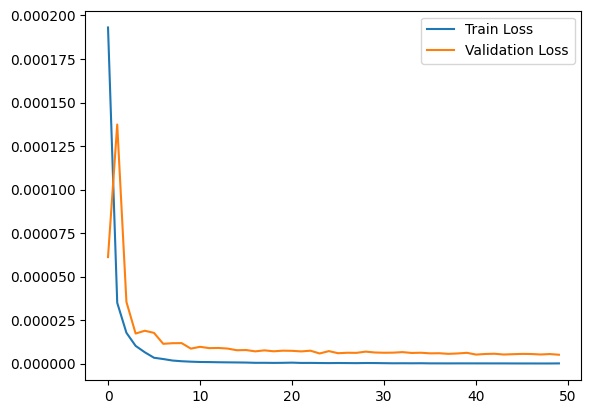

In [ ]:
# Step 7: Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

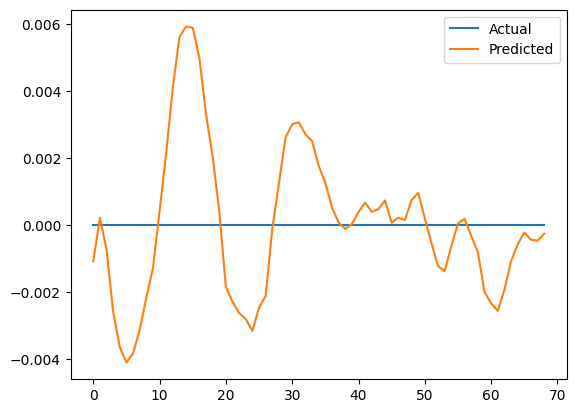

In [ ]:
# Plot predictions vs actual
time_axis = np.arange(len(y_test_rescaled))
plt.plot(time_axis, y_test_rescaled, label='Actual')
plt.plot(time_axis, predictions_rescaled, label='Predicted')
plt.legend()
plt.show()
